# Template fit

This template is based on [Example-Fit.ipynb](https://gitlab.rcg.sfu.ca/teaching/data-analysis-python/Example-Fit.ipynb)

## Step 1: Import packages

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Step 2: Load the data
### Load the data: examine the format
Change the file name from `Example-Data.csv` to the name of the file containing your data.

In [2]:
# Display file contents
file = open('Example-Data.csv', 'r')
print(file.read())

Frequency (Hz),Voltage (mV),Error (mV)
10,16,5
20,45,5
30,64,5
40,75,5
50,70,30
60,115,5
70,142,5
80,167,5
90,183,5
100,160,30
110,221,5


### Load the data: import the data into an array
Change the file name from `Example-Data.csv` to the name of the file containing your data and adjust the options to match your data file format.

In [3]:
# Load file into array
data = np.genfromtxt('Example-Data.csv', delimiter=',', skip_header = 1)
print("data =")
print(data)

data =
[[ 10.  16.   5.]
 [ 20.  45.   5.]
 [ 30.  64.   5.]
 [ 40.  75.   5.]
 [ 50.  70.  30.]
 [ 60. 115.   5.]
 [ 70. 142.   5.]
 [ 80. 167.   5.]
 [ 90. 183.   5.]
 [100. 160.  30.]
 [110. 221.   5.]]


Assign each column of `data` to the new variables for later use.

In [4]:
# Assign each array column to a separate array
frequency = data[:,0]
voltage = data[:,1]
err = data[:,2]
print("frequency =", frequency)
print("voltage =", voltage)
print("err =", err)

frequency = [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110.]
voltage = [ 16.  45.  64.  75.  70. 115. 142. 167. 183. 160. 221.]
err = [ 5.  5.  5.  5. 30.  5.  5.  5.  5. 30.  5.]


## Step 3: Plot the data
Change the variable names, title, axis labels, etc, as appropriate.

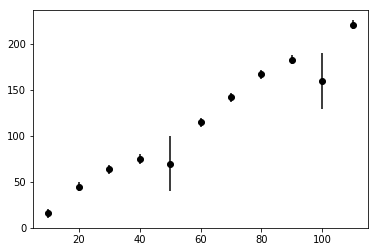

In [5]:
# Plot data
plt.errorbar(frequency,voltage,yerr=err,fmt='ko')

# Uncomment and revise the following lines to format plot
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Voltage (mV)')
# plt.title('Data from Exercise 6.2')

plt.show()

## Step 4: Define the model function
Revise to define your own model function.

In [6]:
# Define model function
def model(x,m,b):
    return m*x + b

## Step 5: Choose initial parameter values for the model
Select your initial parameters, select an appropriate range for your independent variable, and check that the resulting model curve is reasonably close to your data. Adust and repeat if they don't match.

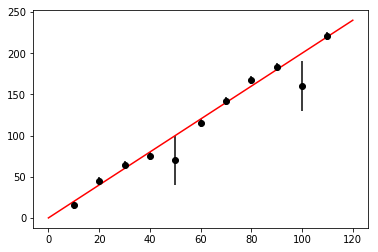

In [7]:
# Set initial parameters m0 and b0
mInit = 2
bInit = 0

# Define new frequency array, fModel, for displaying the model
fModel = np.linspace(0,120,50)

# Make the plot
# Recall the order of the arguments in the model definition, model(x,m,b):
plt.plot(fModel,model(fModel,mInit,bInit),'r-')
plt.errorbar(frequency,voltage,yerr=err,fmt='ko')

# Uncomment and revise the following lines to format plot
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Voltage (mV)')
# plt.title('Data with linear model, initial parameters')
# plt.xlim(0,120)
# plt.ylim(0,250)

plt.show()

## Step 6: Fit the model to the data
Change the variable names to the ones you have defined above. See the [help](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) for details on the `curve_fit` function.

In [8]:
# Fit the model to the data and display results
# The order of the parameter array elements p0, pOpt, and pCov
# are determined by their order [m,b] in the model definition, model(x,m,b):
pOpt, pCov = curve_fit(model,frequency,voltage,p0=[mInit,bInit],sigma=err,absolute_sigma=True)
print("[mOpt bOpt] =", pOpt)
print()
print("pCov =")
print(pCov)

[mOpt bOpt] = [ 2.02846482 -0.94749648]

pCov =
[[ 2.70174409e-03 -1.53402709e-01]
 [-1.53402709e-01  1.14708105e+01]]


Assign the results of `curve_fit` to new variables.

In [9]:
# Assign results of curve_fit to new variables
mOpt = pOpt[0]
bOpt = pOpt[1]
mAlpha = np.sqrt(pCov[0,0])
bAlpha = np.sqrt(pCov[1,1])
rho_mb = pCov[0,1]/(mAlpha*bAlpha)

Display the variables. 

In [10]:
# Display formatted results
print("Default precision:")
print("Model slope (mV/Hz):    ", mOpt, " ± ", mAlpha)
print("Model intercept (mV):", bOpt, " ± ", bAlpha)
print("Correlation coefficient:", rho_mb)

Default precision:
Model slope (mV/Hz):     2.0284648218983428  ±  0.05197830398834128
Model intercept (mV): -0.9474964819135983  ±  3.3868584966351962
Correlation coefficient: -0.8713926108446474


_**Note that you should always round such parameter estimates and uncertainties to the appropriate number of significant figures!**_

Follow the "golden rules" described in Sec. 2.9 of Hughes and Hase, adapted to the model-fitting context.

1. *If and only if the fit between a model and the data is good* (see below for methods to assess fit quality), the best estimate of a parameter is the one returned by the fit, and may be understood as the mean value of the distribution that you would get if you were to conduct the same experiment many times.
2. The error in each parameter is given by the square root of the associated diagonal element of the covariance matrix, and may be understood as the standard error for the parameter. Correlation coefficients between parameters may also be derived from the covariance matrix, using Eq. (7.30) in Hughes and Hase.
3. Round up the error for each parameter to the appropriate number of significant figures (usually just one, but sometimes more—see the discussion on p. 17 of Hughes and Hase, including Footnote #7).
4. Match the number of decimal places in the mean to the standard eror.
5. Include units.

## Step 7: Assess the fit
### Assessing the fit: visual inspection

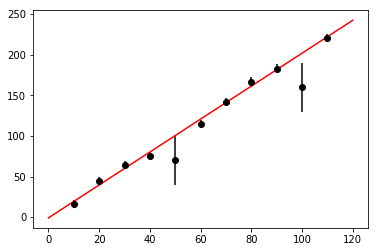

In [11]:
# Plot data with best-fit model
plt.plot(fModel,model(fModel,mOpt,bOpt),'r-')
plt.errorbar(frequency,voltage,yerr=err,fmt='ko')

# Uncomment and revise the following lines to format plot
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Voltage (mV)')
# plt.title('Data with linear model, optimal parameters')
# plt.xlim(0,120)
# plt.ylim(0,250)

plt.show()

### Assessing the fit: compute the $\chi^2$ statistic
Change the definition of `res` to match your dependent variable and model function.

In [12]:
# Compute and display chi-squared
res = voltage - model(frequency,mOpt,bOpt)
normres = res/err
chi2 = np.sum(normres**2)
print("chi2 =", chi2)

chi2 = 9.11590358805301


Compare to the number of statistical degrees of freedom.

In [13]:
# Compute and display DOF
Ndata = np.size(voltage)
Npar = np.size(pOpt)
dof = Ndata - Npar
print("dof =", dof)

dof = 9


### Assessing the fit: plot the (normalized) residuals
Finally, we can check for statistical consistency by confirming that the residuals do not show any systematic pattern. In this example, the uncertainty in two of the measurements is much larger than the others, so the residual plot is overwhelmed by the deviations at these points, as seen below.

The following cell uses the PyPlot `stem` routine to produce the residual plot, which often shows deviations from the zero line more effectively than a regular scatterplot.

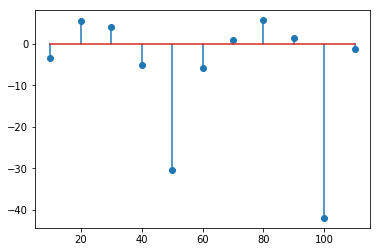

In [14]:
# Show residuals
plt.stem(frequency,res)

# Uncomment and revise the following lines to format plot
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Residual (mV)')
# plt.title('Fit residuals')
# plt.xlim(0,120)

plt.show()

By plotting the normalized residuals, we can see that the large deviations at 50 Hz and 100 Hz are not unexpectedly large, and that the overall pattern of deviations is consistent with random fluctuations.

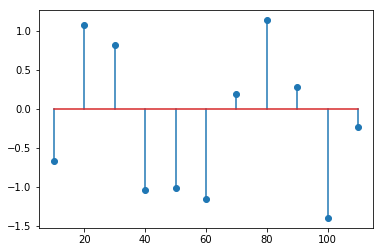

In [15]:
# Show normalized residuals
plt.stem(frequency,normres)

# Uncomment and revise the following lines to format plot
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Residual (mV)')
# plt.title('Fit residuals')
# plt.xlim(0,120)

plt.show()

## Step 8: Decide what to do next
Ideally you will get to the end of this whole process and find that the model fits the data well, and you can report your results with confidence. If time allows, you might even go back and take more data to improve the precision of your parameter estimates. But what happens if your $\chi^2$ statistic is too big or too small, or if the normalized residuals do not appear random? If that's the case, you have a few options:

* Look for defects in your experimental procedure, including the procedure you used to prepare the raw data for analysis (ie, incorrect unit conversion).
* Consider a different model. This may include changes that are based on physical reasoning, such as eliminating approximations to make it more realistic, or purely empirical, such as adding a constant background, or an extra term in a polynomial fit. The residuals should provide guidance on how to change the functional relationship to improve agreement. Just don't overdo it: if you find yourself needing to add many arbitrary fit parameters to achieve a good fit, that is usually a sign that you need to consider a different approach.
* Consider restricting your fit to a narrower range of measurements (i.e., focus on limiting values of $x$ and/or $y$, or on the heights, widths and locations of peaks instead of their detailed shape).
* Consider rescaling the uncertainties, as described in Sec. 8.9 of Hughes and Hase (though note their "health warning" in Footnote 9).
* Accept that you may be unable to remove all sources of systematic error in the given time, and do your best to make a quantitative estimate of your parameter uncertainties in light of them. You don't have to throw all of your data away just because you don't have a model that fits it well.


## Summary
This example can serve as a template for more general problems in data analysis, whether you use Python in a Jupyter notebook or some other computational tool. Let's review the procedure.

* *Load the data:* examine the data file format and import it into an array.
* *Plot the data:* visually inspect the relationship between the independent and dependent variables and evaluate the best way to model it.
* *Define the model:* the model should provide a plausible mathematical description of the data, and will usually involve unknown parameters that you will adjust to obtain the best fit.
* *Fit the model to the data:* pick good initial values for the unknown parameters, then use the computer to determine the optimal values and their uncertainties.
* *Assess the fit quality:* plot the model together with the data, evaluate the $\chi^2$ statistic, and inspect the residuals.
* *Decide what to do next:* if all goes well, report your results and move on. If not, use your results to guide changes to your experiment, your analysis, or both.

This example can also serve as a template for how to use Python in a Jupyter notebook to complete these steps. Let's review the basic Python concepts and expressions.

* *Importing packages:* these will typically include [NumPy](https://docs.scipy.org/doc/numpy-1.15.0/user/index.html), [matplotlib](https://matplotlib.org/users/index.html), and [SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html). See [here](https://docs.python.org/3/tutorial/modules.html#packages) for a general introduction to packages.
* *Importing data files:* for simple file formats, use [genfromtext](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).
* *Defining functions:* see [here](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) for a general introduction to function definitions.
* *Plotting data:* this is what [matplotlib](https://matplotlib.org/users/index.html) was designed for. Within that package, [PyPlot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) has many routines for interactive plotting, such as [errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html), [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html), and [stem](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.stem.html). Once you have the plot, you can use additional routines to format it, such as [xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html), [ylabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html), [title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html), [xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html), and [ylim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html).
* *Curve fitting:* the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) routine includes all of the features that you need for basic use.
* *Mathematical functions:* Python can perform [basic mathematical operations](https://docs.python.org/3/tutorial/introduction.html#numbers), and NumPy includes several additional [mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html) such as trigonometric functions, exponentials, array products and sums, etc.